In [8]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *

from imblearn.over_sampling import SMOTE
from sklearn.neighbors import LocalOutlierFactor
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance
from sklearn.inspection import partial_dependence
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [9]:

#Load Steller data
df=pd.read_csv('C:/Users/Mariam/Desktop/Maryam_Python/dsi_2022-02/star_classification.csv')

for x in ['redshift','u' ,'g','r' ,'i', 'z' ]:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan
    df = df.dropna(axis = 0)
    
# Encoding the categorical value of class 
df['class'] = df['class'].replace({'GALAXY': 0,
                                   'STAR'  : 1,
                                   'QSO'   : 2})

# split the class from other features
y = df["class"]
x = df.drop("class", axis=1)

# Applying SMOTE
smote = SMOTE(random_state=10)
print('Original dataset shape %s' % Counter(y))
x, y = smote.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y))

# concatenate the features
df_1=pd.concat([x,y],axis=1)

Original dataset shape Counter({0: 59150, 1: 21506, 2: 9979})
Resampled dataset shape Counter({0: 59150, 2: 59150, 1: 59150})


In [10]:
df_1.drop(['obj_ID','run_ID','rerun_ID','cam_col','field_ID','spec_obj_ID','fiber_ID'],axis=1,inplace=True)

In [11]:
x = df_1.drop(['class'], axis=1)
y = df_1['class']
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2022)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

In [ ]:
x_train

In [32]:
clf1 = LogisticRegression(solver= 'saga',random_state=1)
clf2 = RandomForestClassifier(n_estimators=100, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(
estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, x_train, y_train, scoring='accuracy', cv=5)
print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

c:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
c:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
c:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
c:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
c:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
c:\Users\Mariam\AppData\Local\Programs\P

Accuracy: 0.96 (+/- 0.00) [Ensemble]


In [19]:
classes = ['GALAXY','QSO','STAR']

c:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge


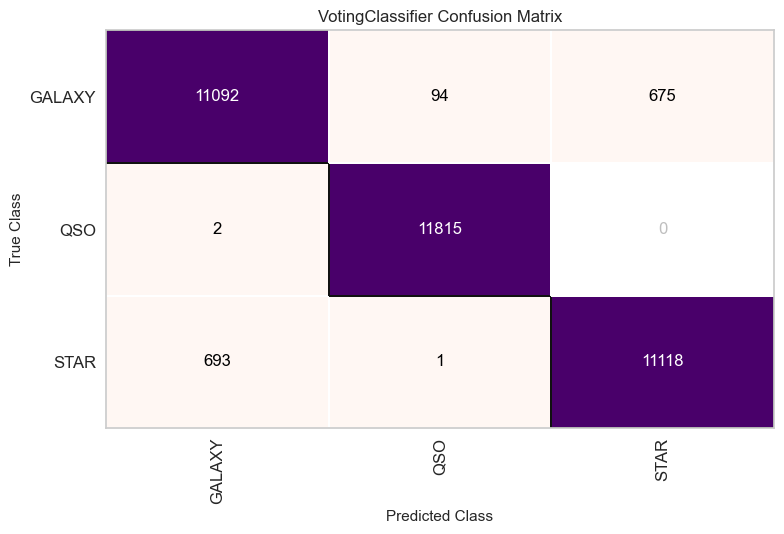

<AxesSubplot: title={'center': 'VotingClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [20]:
Ensemble_c = ConfusionMatrix(clf, classes=classes, cmap='RdPu')
Ensemble_c.fit(x_train, y_train)
Ensemble_c.score(x_test, y_test)
Ensemble_c.show()

In [21]:
y_predicted_ensemble = clf.predict(x_test)
score = clf.score(x_test, y_test)
ensemble_score_ = np.mean(score)

In [27]:
print(classification_report(y_test, y_predicted_ensemble))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     11861
           1       0.99      1.00      1.00     11817
           2       0.94      0.94      0.94     11812

    accuracy                           0.96     35490
   macro avg       0.96      0.96      0.96     35490
weighted avg       0.96      0.96      0.96     35490

